# Montu Python 
## Astronomical ephemerides for the Ancient World
## Example: Compute *Montunctions*


### Goals of this notebook

The goal of this notebook is to determine the stable positions of mars across ancient Egypt history and check when this *marsticies* happened close to the winter solstice and in the Taurus constellation.

In [2]:
# Uncomment this line in Colab
# !pip install -q montu

### Loading tools

We need to load the packages and the required data for it (star database, planet position database, etc.):

In [3]:
# Montu packages and data
import montu
from montu import D2H, PRINTDF, TABLEDF, DEG, RAD

# Other libraries required
import pandas as pd
import copy
import matplotlib.pyplot as plt
import numpy as np

# Load allstars
allstars = montu.Stars()

# These magic commands are intended to allow updating the packages if they change
%load_ext autoreload
%autoreload 2

Running MontuPython version 0.9.5


### *Marstices*

Lets set observing conditions and initial time of exploration:

In [4]:
Tebas = montu.Observer(lon=33,lat=24,height=0)

Our target body:

In [5]:
mars = montu.Planet('Mars')

Now let's predict all the Marstices:

In [6]:
marstices = pd.DataFrame()
i = 0

# Range of years
initial_year = -2500
final_year = -500

mars.reset_store()
mtime = montu.Time(f'{initial_year}-01-01 00:00:00.00',scale='utc',calendar='proleptic')

marstices = []
for _ in montu.WHILE_TRUE():
    jed1,jed2 = mars.next_planesticies(mtime)
    mtime1 = montu.Time(jed1,format='jd',full=True)
    mtime2 = montu.Time(jed2,format='jd',full=True)
    
    # Stopping condition
    if mtime2.readable.year > final_year:
        break
    
    marstices += [pd.DataFrame(dict(
        datepro = [mtime1.readable.datepro,mtime2.readable.datepro],
        datemix = [mtime1.readable.datemix,mtime2.readable.datemix],
        type = ['first','second'],
        jed = [mtime1.jed,mtime2.jed],
    ))]

    mtime = mtime + 2*montu.YEAR
    i += 1

marstices = pd.concat(marstices)
marstices.drop_duplicates(inplace=True)
marstices.reset_index(drop=True,inplace=True)

500it [00:00, 634.56it/s]

1000it [00:01, 554.13it/s]


In [7]:
marstices

,datepro,datemix,type,jed
0,-2501-12-11 14:18:00.6000,-2500-01-01 14:18:18,first,8.079331e+05
1,-2500-02-28 11:01:33.5000,-2500-03-20 11:01:01,second,8.080120e+05
2,-2498-01-29 15:29:56.8000,-2498-02-18 15:29:29,first,8.087121e+05
3,-2498-04-12 10:24:46.7000,-2498-05-02 10:24:24,second,8.087849e+05
4,-2496-04-10 00:28:03.3000,-2496-04-30 00:28:28,first,8.095135e+05
...,...,...,...,...
1869,-0506-09-04 21:49:24.5000,-506-09-10 21:49:49,second,1.536494e+06
1870,-0504-08-30 13:09:38.6000,-504-09-05 13:09:09,first,1.537220e+06
1871,-0504-11-10 12:33:59.5000,-504-11-16 12:33:33,second,1.537292e+06
1872,-0502-10-10 16:51:06.0000,-502-10-16 16:51:51,first,1.537991e+06


Now we want to add to this information other relevant astronomical information:

1. Position of mars in the sky
2. Date of occurrence of winter solstices
3. Angular distance of Mars to Aldebaran

Position of Mars in the sky:

In [8]:
mars.reset_store()
for index in montu.PROGRESS(marstices.index):
    marstice = marstices.loc[index]

    # Get MonTime object
    mtime = montu.Time(marstice.jed,format='jd')

    # Calculate Mars position and store it
    mars.conditions_in_sky(mtime,Tebas,store=1)
mars.tabulate_store()

 19%|█▉        | 360/1874 [00:00<00:02, 623.61it/s]

100%|██████████| 1874/1874 [00:03<00:00, 599.77it/s]


Positions are stored in a separate dataframe:

In [9]:
mars_marstices = copy.deepcopy(mars.position)
mars_marstices['Vmag'] = mars.condition.Vmag
mars_marstices

,tt,jed,Name,RAJ2000,DecJ2000,RAEpoch,DecEpoch,RAGeo,DecGeo,el,az,Vmag
0,-142008008819,8.079331e+05,Mars,12.690686,-0.203382,8.728028,22.675644,8.727972,22.677848,-40.778490,19.728474,-0.53
1,-142001195006,8.080120e+05,Mars,11.559613,6.778648,7.409611,26.015611,7.409403,26.017436,-10.097051,55.461372,-0.80
2,-141940698958,8.087121e+05,Mars,15.359105,-15.326684,11.466887,7.338935,11.466735,7.340787,-39.298238,56.969812,-1.13
3,-141934410068,8.087849e+05,Mars,14.290007,-13.100833,10.436292,11.029086,10.436079,11.031287,-28.497914,61.314458,-1.51
4,-141871460327,8.095135e+05,Mars,19.725768,-23.310481,15.233413,-19.872896,15.233466,-19.869225,45.320815,191.747029,-2.15
...,...,...,...,...,...,...,...,...,...,...,...,...
1869,-79060353742,1.536494e+06,Mars,23.006199,-11.674151,20.715271,-23.418157,20.715457,-23.414697,32.736253,216.581241,-1.98
1870,-78997658558,1.537220e+06,Mars,3.772105,17.271194,1.514450,6.586747,1.514421,6.588904,-58.778088,12.376669,-1.44
1871,-78991439897,1.537292e+06,Mars,2.614838,15.741818,0.423314,2.972830,0.423091,2.974326,-2.157872,85.168320,-1.02
1872,-78931030900,1.537991e+06,Mars,6.919953,23.751538,4.395169,22.487648,4.394980,22.489512,-16.465913,55.376534,-0.76


Compute the date of the previous and next winter solstice, and the days elapsed to the closest one:

In [10]:
# Loop on marstices
for index in montu.PROGRESS(marstices.index):
    marstice = marstices.loc[index]

    # Get MonTime object
    mtime = montu.Time(marstice.jed,format='jd')

    # Calculate next and previous solstices
    prev_seasons = montu.Sun.previous_seasons(at=mtime)
    next_seasons = montu.Sun.next_seasons(at=mtime)
    
    # Get the closest solstice
    closest_solstice = min(abs(mtime.jed - prev_seasons[3]),
                           abs(mtime.jed - next_seasons[3]))

    # Add winter solstice to DataFrame
    marstices.loc[index,'closest_solstice'] = closest_solstice

marstices
    

 10%|█         | 196/1874 [00:00<00:05, 330.65it/s]

100%|██████████| 1874/1874 [00:05<00:00, 317.25it/s]


,datepro,datemix,type,jed,closest_solstice
0,-2501-12-11 14:18:00.6000,-2500-01-01 14:18:18,first,8.079331e+05,8.252537
1,-2500-02-28 11:01:33.5000,-2500-03-20 11:01:01,second,8.080120e+05,70.611038
2,-2498-01-29 15:29:56.8000,-2498-02-18 15:29:29,first,8.087121e+05,40.305596
3,-2498-04-12 10:24:46.7000,-2498-05-02 10:24:24,second,8.087849e+05,113.093674
4,-2496-04-10 00:28:03.3000,-2496-04-30 00:28:28,first,8.095135e+05,111.194290
...,...,...,...,...,...
1869,-0506-09-04 21:49:24.5000,-506-09-10 21:49:49,second,1.536494e+06,106.888026
1870,-0504-08-30 13:09:38.6000,-504-09-05 13:09:09,first,1.537220e+06,111.737487
1871,-0504-11-10 12:33:59.5000,-504-11-16 12:33:33,second,1.537292e+06,39.762245
1872,-0502-10-10 16:51:06.0000,-502-10-16 16:51:51,first,1.537991e+06,71.062716


In [11]:
marstices.iloc[:10]

,datepro,datemix,type,jed,closest_solstice
0,-2501-12-11 14:18:00.6000,-2500-01-01 14:18:18,first,807933.095840,8.252537
1,-2500-02-28 11:01:33.5000,-2500-03-20 11:01:01,second,808011.959416,70.611038
2,-2498-01-29 15:29:56.8000,-2498-02-18 15:29:29,first,808712.145796,40.305596
3,-2498-04-12 10:24:46.7000,-2498-05-02 10:24:24,second,808784.933874,113.093674
4,-2496-04-10 00:28:03.3000,-2496-04-30 00:28:28,first,809513.519483,111.194290
5,-2496-06-10 18:09:13.9000,-2496-06-30 18:09:09,second,809575.256411,172.931218
6,-2494-06-23 03:46:02.5000,-2494-07-13 03:46:46,first,810317.656973,180.392186
7,-2494-08-28 02:23:41.7000,-2494-09-17 02:23:23,second,810383.599788,114.449371
8,-2492-08-10 22:35:32.0000,-2492-08-30 22:35:35,first,811097.441343,131.094610
9,-2492-10-24 10:45:59.1000,-2492-11-13 10:45:45,second,811171.948601,56.587352


Now we want to compute the angular distance to Aldebaran. For this purpose, we need to get the information about the star from the database:

In [12]:
aldebaran = allstars.get_stars(ProperName='Aldebaran')
aldebaran

1 star(s):
|    |   MN |    HD |   HR |   HIP | Gl        | Name      | OtherDesignations                                                                     | ProperName   | Bayer   | Flamsteed   | Constellation   |   RAJ2000 |   DecJ2000 |   pmRA |   pmDec |   RadVel |   Distance |   Vmag |   Vmag_min |   Vmag_max |   B-V | SpType   |   Luminosity |   XJ2000 |   YJ2000 |   ZJ2000 |   VXJ2000 |   VYJ2000 |   VZJ2000 |   Primary | MultipleID   |   IsMultiple |   IsVariable |
|----|------|-------|------|-------|-----------|-----------|---------------------------------------------------------------------------------------|--------------|---------|-------------|-----------------|-----------|------------|--------|---------|----------|------------|--------|------------|------------|-------|----------|--------------|----------|----------|----------|-----------|-----------|-----------|-----------|--------------|--------------|--------------|
| 14 |   15 | 29139 | 1457 | 21421 | Gl 171.1A | Al

Now we will compute for each marstice, the angular distance to Aldebaran:

In [13]:
# Loop on marstices
for index in montu.PROGRESS(marstices.index):

    # Get marstice information and location of mars
    marstice = marstices.loc[index]
    mars_location = mars_marstices.loc[index]

    # Propagate aldebaran to epoch
    mtime = montu.Time(marstice.jed,format='jd')
    aldebaran.where_in_space(at=mtime,inplace=True)

    # Compute angular distance
    aldebaran_angdist = montu.Util.haversine_distance(
        mars_location.DecJ2000*DEG,15*mars_location.RAJ2000*DEG,
        float(aldebaran.data.DecJ2000t)*DEG,15*float(aldebaran.data.RAJ2000t)*DEG
    )*RAD    
    
    # uncomment to check
    """
    print(marstice.jed,marstice.datemix)
    print(D2H(mars_location.DecJ2000),D2H(mars_location.RAJ2000))
    print(D2H(aldebaran.data.DecJ2000t),D2H(float(aldebaran.data.RAJ2000t)))
    print(D2H(aldebaran_angdist))
    break
    #"""

    # Angular distance
    marstices.loc[index,'aldebaran_angdist'] = aldebaran_angdist

marstices

 30%|██▉       | 553/1874 [00:02<00:04, 285.19it/s]

100%|██████████| 1874/1874 [00:07<00:00, 254.39it/s]


,datepro,datemix,type,jed,closest_solstice,aldebaran_angdist
0,-2501-12-11 14:18:00.6000,-2500-01-01 14:18:18,first,8.079331e+05,8.252537,120.050940
1,-2500-02-28 11:01:33.5000,-2500-03-20 11:01:01,second,8.080120e+05,70.611038,101.768412
2,-2498-01-29 15:29:56.8000,-2498-02-18 15:29:29,first,8.087121e+05,40.305596,162.155341
3,-2498-04-12 10:24:46.7000,-2498-05-02 10:24:24,second,8.087849e+05,113.093674,146.456737
4,-2496-04-10 00:28:03.3000,-2496-04-30 00:28:28,first,8.095135e+05,111.194290,135.557604
...,...,...,...,...,...,...
1869,-0506-09-04 21:49:24.5000,-506-09-10 21:49:49,second,1.536494e+06,106.888026,87.553815
1870,-0504-08-30 13:09:38.6000,-504-09-05 13:09:09,first,1.537220e+06,111.737487,11.832605
1871,-0504-11-10 12:33:59.5000,-504-11-16 12:33:33,second,1.537292e+06,39.762245,28.523663
1872,-0502-10-10 16:51:06.0000,-502-10-16 16:51:51,first,1.537991e+06,71.062716,33.393108


In [14]:
marstices.aldebaran_angdist.describe()

count    1874.000000
mean       83.998611
std        50.374376
min         3.140104
25%        39.789969
50%        80.763274
75%       126.587916
max       176.560331
Name: aldebaran_angdist, dtype: float64

Now we will mark the marstices according to closest solstice and aldebaran angular distance:

In [88]:
max_days_to_solstice = 15 # days
max_aldebaran_angdist = 15 # degrees
max_aldebaran_conjunc = 5 # degrees

marstices['close_solstice'] = False
marstices['close_aldebaran'] = False
marstices['conj_aldebaran'] = False
marstices['montunctions'] = False

cond_solstices = (marstices['closest_solstice']<=max_days_to_solstice)
marstices.loc[cond_solstices,'close_solstice'] = True
print("Number of marstices close to solstices: ",cond_solstices.sum())

cond_aldebaran = (marstices['aldebaran_angdist']<=max_aldebaran_angdist)
marstices.loc[cond_aldebaran,'close_aldebaran'] = True
print("Number of marstices close to Aldebaran: ",cond_aldebaran.sum())

cond_montunctions = (cond_solstices) & (cond_aldebaran)
marstices.loc[cond_montunctions,'montunctions'] = True
print("Number of Montunctions: ",cond_montunctions.sum())

cond_conjunction = (marstices['aldebaran_angdist']<=max_aldebaran_conjunc)
marstices.loc[cond_conjunction,'conj_aldebaran'] = True
print("Number of close conjunctions: ",cond_conjunction.sum())

Number of marstices close to solstices:  196
Number of marstices close to Aldebaran:  163
Number of Montunctions:  24
Number of close conjunctions:  21


These are the dates:

In [89]:
mtime_start = montu.Time('bce2050-01-01 00:00:00.00')+(-10*montu.YEAR)
mtime_end = montu.Time('bce2050-01-01 00:00:00.00')+10*montu.YEAR
cond = (marstices.jed>=mtime_start.jed) & (marstices.jed<=mtime_end.jed)
marstices[cond]

,datepro,datemix,type,jed,closest_solstice,aldebaran_angdist,close_solstice,close_aldebaran,conj_aldebaran,montunctions
414,-2059-12-21 02:40:39.8000,-2058-01-07 02:40:40,first,969379.611572,0.810448,123.100408,True,False,False,False
415,-2058-03-09 21:28:02.2000,-2058-03-26 21:28:28,second,969458.394470,79.593347,104.842060,False,False,False,False
416,-2056-02-08 14:11:30.2000,-2056-02-25 14:11:11,first,970159.091322,49.803561,165.425484,False,False,False,False
417,-2056-04-21 03:07:42.6000,-2056-05-08 03:07:07,second,970231.630354,122.342594,149.812103,False,False,False,False
418,-2054-04-20 17:13:04.3000,-2054-05-07 17:13:13,first,970961.217411,121.447704,131.404104,False,False,False,False
419,-2054-06-21 04:30:12.5000,-2054-07-08 04:30:30,second,971022.687645,182.329775,140.850999,False,False,False,False
420,-2052-07-02 06:19:05.5000,-2052-07-19 06:19:19,first,971764.763258,170.729826,54.382295,False,False,False,False
421,-2052-09-06 11:55:55.3000,-2052-09-23 11:55:55,second,971830.997168,104.495917,67.845095,False,False,False,False
422,-2050-08-20 12:14:30.0000,-2050-09-06 12:14:14,first,972544.010069,121.965999,3.355051,False,True,True,False
423,-2050-11-03 04:34:50.5000,-2050-11-20 04:34:34,second,972618.690862,47.285206,18.037689,False,False,False,False


### Periodicity of marstices and montunctions

Now we want to calculate the periodicities of Marstices and Montunctions by calculating the difference in time between consecutive phenomena.

### Setting parameters for winter marstices, aldebaran conjunctions and montunctions

In [90]:
max_days_to_solstice = 15 # days
max_aldebaran_angdist = 15 # degrees

marstices['close_solstice'] = False
marstices['close_aldebaran'] = False
marstices['conj_aldebaran'] = False
marstices['montunctions'] = False

cond_solstices = (marstices['closest_solstice']<=max_days_to_solstice)
marstices.loc[cond_solstices,'close_solstice'] = True
print("Number of marstices close to solstices: ",cond_solstices.sum())

cond_aldebaran = (marstices['aldebaran_angdist']<=max_aldebaran_angdist)
marstices.loc[cond_aldebaran,'close_aldebaran'] = True
print("Number of marstices close to Aldebaran: ",cond_aldebaran.sum())

cond_montunctions = (cond_solstices) & (cond_aldebaran)
marstices.loc[cond_montunctions,'montunctions'] = True
print("Number of Montunctions: ",cond_montunctions.sum())

cond_conjunction = (marstices['aldebaran_angdist']<=max_aldebaran_conjunc)
marstices.loc[cond_conjunction,'conj_aldebaran'] = True
print("Number of close conjunctions: ",cond_conjunction.sum())

montunctions = marstices.loc[marstices.montunctions]

Number of marstices close to solstices:  196
Number of marstices close to Aldebaran:  163
Number of Montunctions:  24
Number of close conjunctions:  21


### Periodicity of marstices

In [91]:
times = marstices.jed.to_numpy()
delta1 = times[2::2]-times[:-2:2]
delta2 = times[1::2]-times[:-1:2]

Histogram of times:

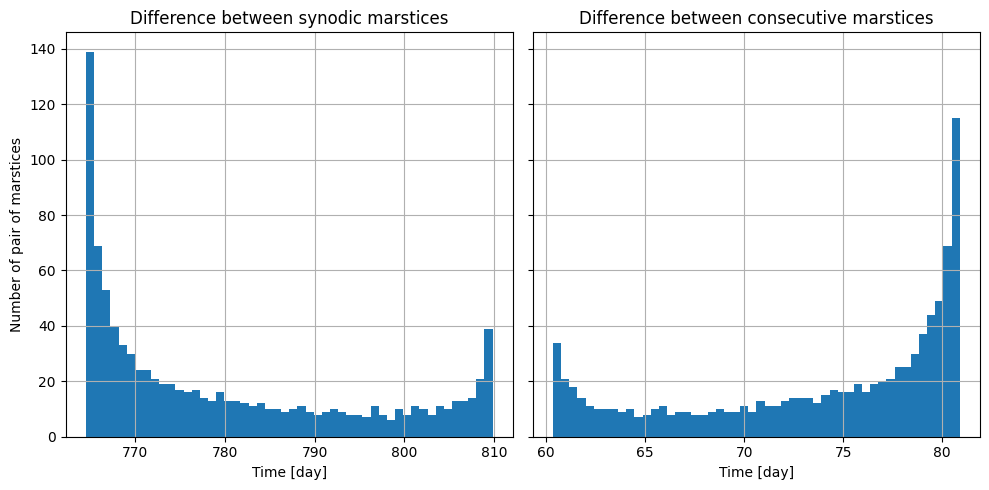

In [92]:
fig,axs = plt.subplots(1,2,figsize=(10,5),sharey=True)

ax = axs[0]
hs1 = ax.hist(delta1,bins=50)
ax.set_xlabel("Time [day]")
ax.set_ylabel("Number of pair of marstices")
ax.set_title("Difference between synodic marstices")
ax.grid()

ax = axs[1]
hs2 = ax.hist(delta2,bins=50)
ax.set_title("Difference between consecutive marstices")
ax.set_xlabel("Time [day]")
ax.grid()

fig.tight_layout()

In [93]:
print(f"Periodicity of synodic marstices: {hs1[1][0]:.1f} - {hs1[1][-1]:.1f}")
print(f"Periodicity of consecutive marstices: {hs2[1][0]:.1f} - {hs2[1][-1]:.1f}")


Periodicity of synodic marstices: 764.5 - 809.9
Periodicity of consecutive marstices: 60.3 - 80.9


#### Periodicity of winter marstices

Let's extract the winter marstices:

In [94]:
winter_marstices = marstices[marstices.close_solstice]

Let's get the periodicity:

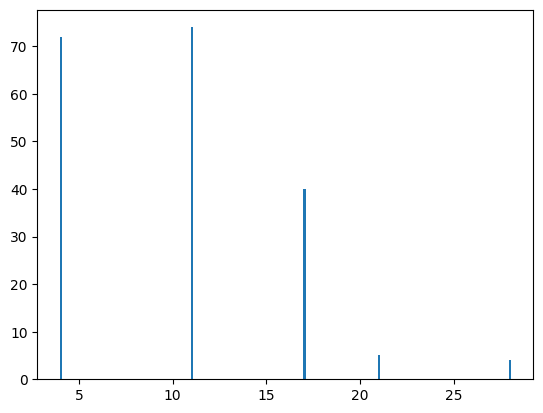

In [95]:
times = winter_marstices.jed.to_numpy()
delta = (times[1:]-times[:-1])*montu.DAY/montu.YEAR
hs = plt.hist(delta,bins=200)


Get the periodicities:

In [96]:
# Times
ts = (hs[1][1:]+hs[1][:-1])/2
# Frequencies
fs = hs[0]
# Times with a positive frequency
cond = fs>0
isort = fs[cond].argsort()[::-1]
Ps = ts[cond][isort]
print("Periods of winter marstices [years]: ", Ps)

Periods of winter marstices [years]:  [11.0162576   4.03507962 17.03451448 21.00656402 27.98774199]


#### Periodicity of Aldebaran conjunctions

Let's extract the Aldebaran conjunctions:

In [97]:
aldebaran_marstices = marstices[marstices.close_aldebaran]
len(aldebaran_marstices)

163

Let's get the periodicity:

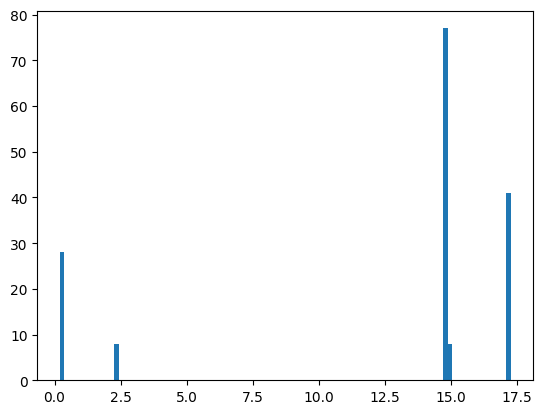

In [98]:
times = aldebaran_marstices.jed.to_numpy()
delta = (times[1:]-times[:-1])*montu.DAY/montu.YEAR
hs = plt.hist(delta,bins=100)


Get the periodicities:

In [99]:
# Times
ts = (hs[1][1:]+hs[1][:-1])/2
# Frequencies
fs = hs[0]
# Times with a positive frequency
cond = fs>0
isort = fs[cond].argsort()[::-1]
Ps = ts[cond][isort]
print("Periods of winter marstices [years]: ", Ps)

Periods of winter marstices [years]:  [14.80330875 17.19389575  0.28903055 14.97406496  2.33810512]


#### Periodicity of Montunctions

Let's extract the Aldebaran conjunctions:

In [100]:
len(montunctions)

24

Let's get the periodicity:

Text(0, 0.5, 'Number of Montunctions')

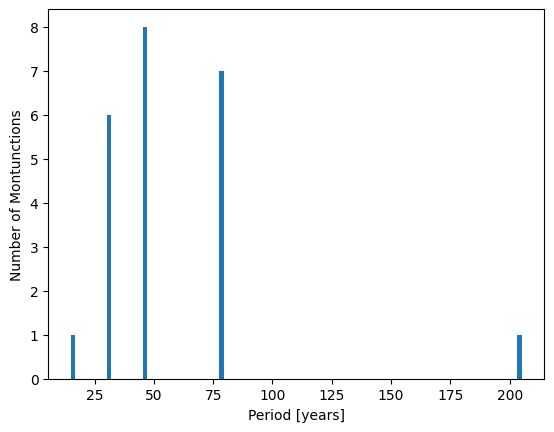

In [101]:
times = montunctions.jed.to_numpy()
delta = (times[1:]-times[:-1])*montu.DAY/montu.YEAR
hs = plt.hist(delta,bins=100)
plt.xlabel("Period [years]")
plt.ylabel("Number of Montunctions")

Get the periodicities:

In [102]:
# Times
ts = (hs[1][1:]+hs[1][:-1])/2
# Frequencies
fs = hs[0]
# Times with a positive frequency
cond = fs>0
isort = fs[cond].argsort()[::-1]
Ps = ts[cond][isort]
print("Periods of Montunctions [years]: ", Ps)

Periods of Montunctions [years]:  [ 46.31123293  78.61829458  31.1079098  204.04571042  15.90458667]


### Lines chart of marstices and montunctions

In [103]:
# Selection of marstices
selection = marstices.loc[:]
nmarstices = len(selection)

jed_min = (1-1e-3)*selection.jed.min()
jed_max = (1+1e-3)*selection.jed.max()

# Number of panels
npanels = 6
delta_jed = (jed_max - jed_min)/npanels

In [104]:
import datetime

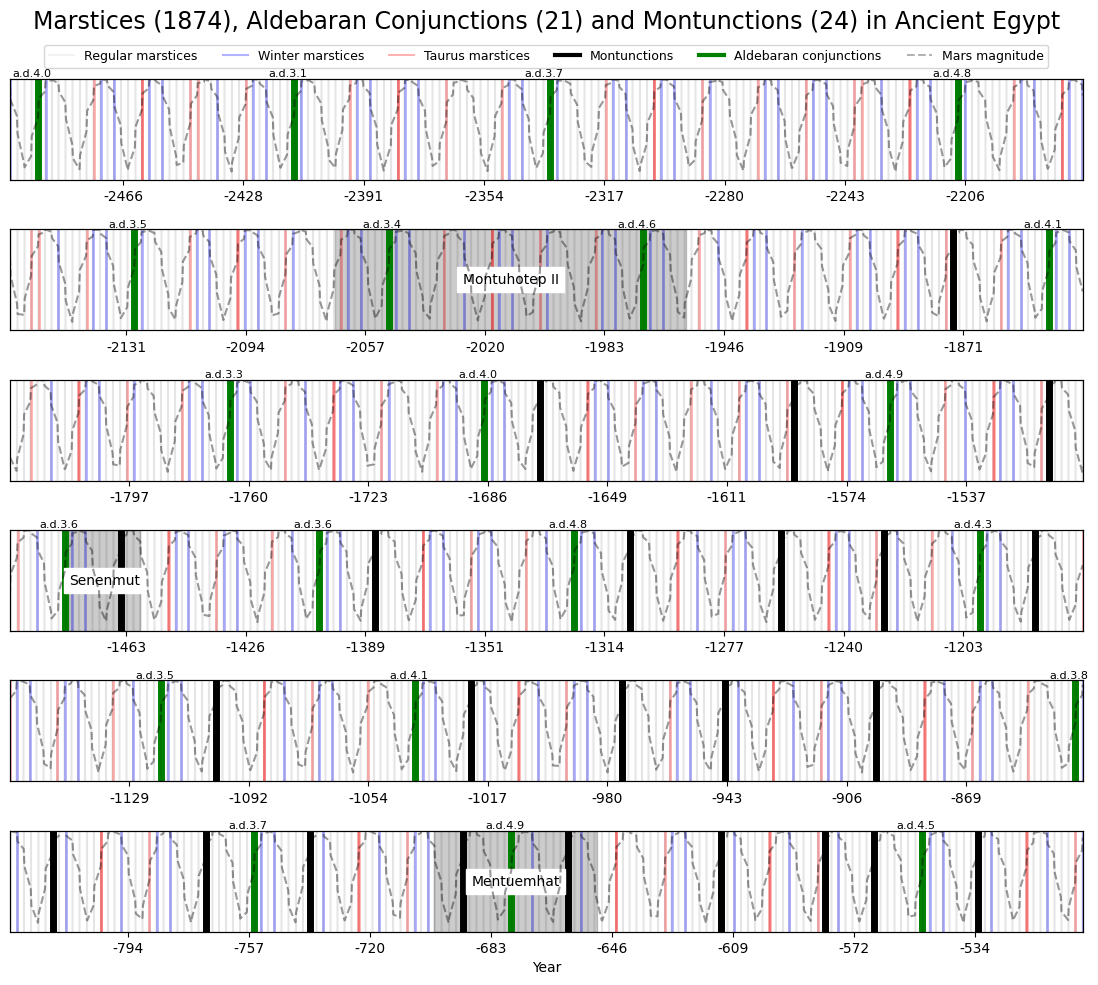

In [118]:
fig,axs = plt.subplots(npanels,1,figsize=(12,10))

axts = []
for ax in axs:
    axts += [ax.twinx()]

alpha_marst = 0.05
alpha_wmarst = 0.3
alpha_aldeb = 0.3
alpha_montu = 1
alpha_mag = 0.3

# Loop on marstices
for index in selection.index:

    # Get marstice information and location of mars
    marstice = selection.loc[index]
    mars_location = mars_marstices.loc[index]

    # Get MonTime object
    mtime = montu.Time(marstice.jed,format='jd')

    # Get panel
    i = int(np.floor((mtime.jed - jed_min)/delta_jed))
    
    # Plot line for marstices
    axs[i].axvline(mtime.jed,color='k',alpha=alpha_marst)

    # Plot line for winter marstices
    if marstice.close_solstice:
        axs[i].axvline(mtime.jed,color='b',lw=2,alpha=alpha_wmarst)

    # Plot line for aldebaran conjunctions
    if marstice.close_aldebaran:
        axs[i].axvline(mtime.jed,color='r',lw=2,alpha=alpha_aldeb)

    # Plot line for aldebaran close conjunctions
    if marstice.conj_aldebaran:
        axs[i].axvline(mtime.jed,color='g',lw=5,alpha=alpha_montu)
        
    # Plot line for montunctions
    if marstice.close_solstice and marstice.close_aldebaran:
        axs[i].axvline(mtime.jed,color='k',lw=5,alpha=alpha_montu)

# Plot distance
for i,axt in enumerate(axts):
    jed_ax_min = jed_min + i*delta_jed
    jed_ax_max = jed_ax_min + delta_jed
    cond = (marstices.jed>=jed_ax_min)&(marstices.jed<=jed_ax_max)
    #axt.plot(marstices[cond].jed,mars.df[cond].site_distance,'k',alpha=0.4)
    axt.plot(marstices[cond].jed,mars_marstices[cond].Vmag,'k--',alpha=0.4)
    
# Loop on marstices
for index in selection.index:
    # Get MonTime object
    mtime = montu.Time(marstice.jed,format='jd')

    # Get marstice information and location of mars
    marstice = selection.loc[index]
    
    # Get panel
    i = int(np.floor((mtime.jed - jed_min)/delta_jed))
    
    # Plot line for aldebaran close conjunctions
    if marstice.conj_aldebaran:
        mmin,mmax = axts[i].get_ylim()
        t = axts[i].text(mtime.jed,0.95*mmax,f"a.d.{marstice.aldebaran_angdist:.1f}",
                         ha='center',va='center',fontsize=8)

# Decoration
for i,ax in enumerate(axs):
    ax.margins(0)
    ax.get_yaxis().set_visible(False)
    jed_ax_min = jed_min + i*delta_jed
    jed_ax_max = jed_ax_min + delta_jed
    ax.set_xticks(np.linspace(jed_ax_min,jed_ax_max,10))
    
# Change xticks
for ax in axs:
    xticks = ax.get_xticks()
    xtick_labels = []
    for xt in xticks:
        mtime = montu.Time(xt,format='jd',full=True)
        xtick_labels += [f'{mtime.readable.year}']
    ax.set_xticklabels(xtick_labels)

for ax in axts:
    ax.margins(0)
    ax.set_yticks(np.arange(-2.5,0.0,0.5))
    ax.get_yaxis().set_visible(False)

# Legends 
axs[0].plot([],[],'k-',alpha=alpha_marst,label='Regular marstices')
axs[0].plot([],[],'b-',alpha=alpha_wmarst,label='Winter marstices')
axs[0].plot([],[],'r-',alpha=alpha_aldeb,label='Taurus marstices')
axs[0].plot([],[],'k-',alpha=alpha_montu,lw=3,label='Montunctions')
axs[0].plot([],[],'g-',alpha=alpha_montu,lw=3,label='Aldebaran conjunctions')
axs[0].plot([],[],'k--',alpha=alpha_mag,label='Mars magnitude')
axs[0].legend(bbox_to_anchor=(0.5,1.4),ncol=6,fontsize=9,loc='upper center')

# Other decoration
axs[-1].set_xlabel('Year')

axs[0].text(0.5,1.5,f"Marstices ({len(marstices)}), Aldebaran Conjunctions ({selection.conj_aldebaran.sum()}) and Montunctions ({len(montunctions)}) in Ancient Egypt",
            transform=axs[0].transAxes,fontsize=17,ha='center')

# Spans
# Montuhotep II 
iax = 1
j1 = montu.Time('-2066-01-01').jed
j2 = montu.Time('-1957-01-01').jed
jk = (j1+j2)/2
mmin,mmax = axs[iax].get_ylim()
axs[iax].axvspan(j1,j2,color='k',alpha=0.2)
t = axs[iax].text(jk,0.0,'Montuhotep II',ha='center',va='center',fontsize=10)
t.set_bbox(dict(facecolor='white', edgecolor='white'))

# Senenmut
iax = 3
j1 = montu.Time('-1480-01-01').jed
j2 = montu.Time('-1458-01-01').jed
jmin,jmax = axs[iax].get_xlim()
j1 = max(j1,jmin)
j2 = min(j2,jmax)
jk = (j1+j2)/2
mmin,mmax = axs[iax].get_ylim()
axs[iax].axvspan(j1,j2,color='k',alpha=0.2)
t = axs[iax].text(jk,0.0,'Senenmut',ha='center',va='center',fontsize=10)
t.set_bbox(dict(facecolor='white', edgecolor='white'))

# Mentuemhat
iax = 5
j1 = montu.Time('-700-01-01').jed
j2 = montu.Time('-650-01-01').jed
jk = (j1+j2)/2
mmin,mmax = axs[iax].get_ylim()
axs[iax].axvspan(j1,j2,color='k',alpha=0.2)
t = axs[iax].text(jk,0.0,'Mentuemhat',ha='center',va='center',fontsize=10)
t.set_bbox(dict(facecolor='white', edgecolor='white'))

fig.tight_layout()

Magnitude at Montunctions:

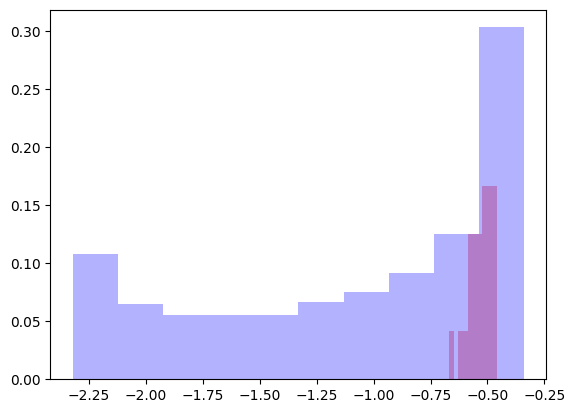

In [119]:
cond = cond_montunctions = (cond_solstices) & (cond_aldebaran)
hs = plt.hist(mars_marstices[cond].Vmag,color='r',alpha=0.3,
              weights=[1/len(mars_marstices[cond])]*len(mars_marstices[cond]))
hs = plt.hist(mars_marstices.Vmag,color='b',alpha=0.3,
              weights=[1/len(mars_marstices)]*len(mars_marstices))

### Montunctions visualization

Let's see one of this *montunctions* in the sky:

In [120]:
# Time of montunction
mtime_montunction = montu.Time(montunctions.iloc[-5].jed,format='jd',full=True)
t = mtime_montunction.tt

mars.reset_store()
for t in np.linspace(-50*montu.DAY,0*montu.DAY,50):
    # Get MonTime object
    mtime = mtime_montunction + t

    # Calculate Mars position and store it
    mars.where_in_sky(mtime,Tebas,store=1)
mars.tabulate_store()

Create a map of montunction:

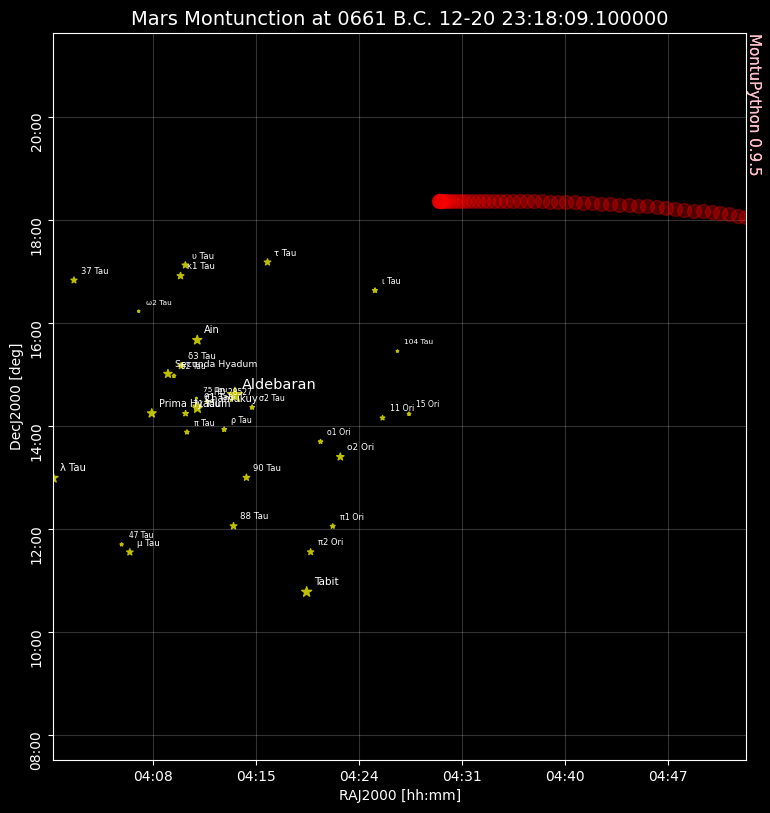

In [121]:
# Plot Hyades
hyades = allstars.get_stars_around(center=[aldebaran.data.RAJ2000,aldebaran.data.DecJ2000],radius=10,Vmag=[-1,5])
fig,ax = hyades.plot_stars(pad=0.0,labels=True,figargs=dict(figsize=(8,8)))

for index in mars.position.index:
    mars_position = mars.position.loc[index]
    ax.plot(15*mars_position.RAJ2000,mars_position.DecJ2000,'ro',ms=10,alpha=0.3)

ax.set_title(f"Mars Montunction at {mtime_montunction.readable.datespice}",fontsize=14)
montu.Util.montu_mark(ax);

## Interesting montunctions

We are interested in the Montunctions happening around the date of birth or dead of Senenmut who, according to several chronologies lived between 1480bce and 1458 bce. Let's select the montunctions in this range:

In [148]:
mtime_start = montu.Time('bce1480-01-01 00:00:00.00')+(-50*montu.YEAR)
mtime_end = montu.Time('bce1480-01-01 00:00:00.00')+50*montu.YEAR

cond = (montunctions.jed>=mtime_start.jed) & (montunctions.jed<=mtime_end.jed)
print("Number of montunctions in the desired interval: ",cond.sum())

montunctions_selected = montunctions.loc[cond]
montunctions_selected

Number of montunctions in the desired interval:  2


,datepro,datemix,type,jed,closest_solstice,aldebaran_angdist,close_solstice,close_aldebaran,conj_aldebaran,montunctions
927,-1512-12-10 23:40:17.3000,-1512-12-24 23:40:40,second,1.169158e+06,8.282254,14.651087,True,True,False,True
971,-1465-12-06 03:30:47.8000,-1465-12-19 03:30:30,second,1.186319e+06,14.549713,9.723496,True,True,False,True


Let's see the montunctions:


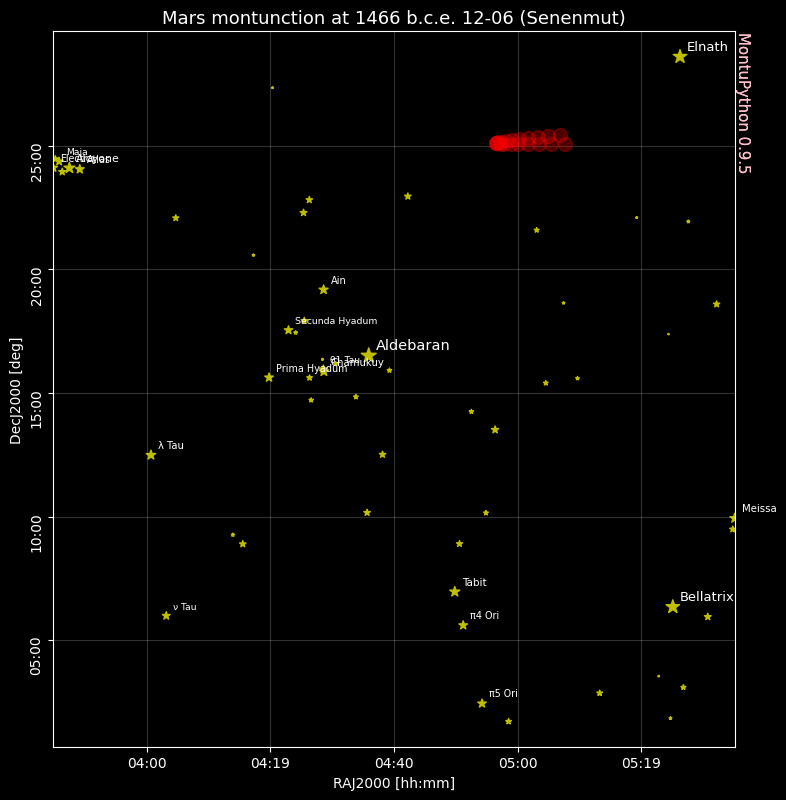

In [156]:
# Time of montunction
isel = 1
mtime_montunction = montu.Time(montunctions_selected.iloc[isel].jed,format='jd',full=True)
t = mtime_montunction.tt

mars.reset_store()
for t in np.linspace(-20*montu.DAY,20*montu.DAY,20):
    # Get MonTime object
    mtime = mtime_montunction + t

    # Calculate Mars position and store it
    mars.where_in_sky(mtime,Tebas,store=1)
mars.tabulate_store()

# Plot Hyades
hyades = allstars.get_stars_around(center=[aldebaran.data.RAJ2000,aldebaran.data.DecJ2000],radius=15,Vmag=[-1,5])
fig,ax = hyades.plot_stars(pad=0.0,labels=True,label_mag=4,figargs=dict(figsize=(8,8)))

for index in mars.position.index:
    mars_position = mars.position.loc[index]
    ax.plot(15*mars_position.RAJ2000,mars_position.DecJ2000,'ro',ms=10,alpha=0.3)

ax.set_title(f"Mars montunction at {-mtime_montunction.readable.year+1} \
b.c.e. {mtime_montunction.readable.month:02d}-{mtime_montunction.readable.day:02d} (Senenmut)",fontsize=13)
montu.Util.montu_mark(ax);

We are interested in the Montunctions happening around the date of birth or dead of Mentuhotep (2119 - 2103)

In [157]:
mtime_start = montu.Time('bce600-01-01 00:00:00.00')+(-70*montu.YEAR)
mtime_end = montu.Time('bce600-01-01 00:00:00.00')+70*montu.YEAR

cond = (montunctions.jed>=mtime_start.jed) & (montunctions.jed<=mtime_end.jed)
print("Number of montunctions in the desired interval: ",cond.sum())

montunctions_selected = montunctions.loc[cond]
montunctions_selected

Number of montunctions in the desired interval:  5


,datepro,datemix,type,jed,closest_solstice,aldebaran_angdist,close_solstice,close_aldebaran,conj_aldebaran,montunctions
1725,-0660-12-20 23:18:09.1000,-660-12-27 23:18:18,second,1.480354e+06,0.604677,13.079182,True,True,False,True
1769,-0613-12-14 20:15:27.3000,-613-12-21 20:15:15,second,1.497514e+06,5.938564,8.667736,True,True,False,True
1799,-0581-12-25 06:26:22.2000,-581-12-31 06:26:26,second,1.509212e+06,3.708349,14.680452,True,True,False,True
1813,-0566-12-08 08:31:32.1000,-566-12-14 08:31:31,second,1.514674e+06,12.862503,8.097878,True,True,False,True
1843,-0534-12-18 05:15:19.6000,-534-12-24 05:15:15,second,1.526372e+06,2.773414,9.781388,True,True,False,True


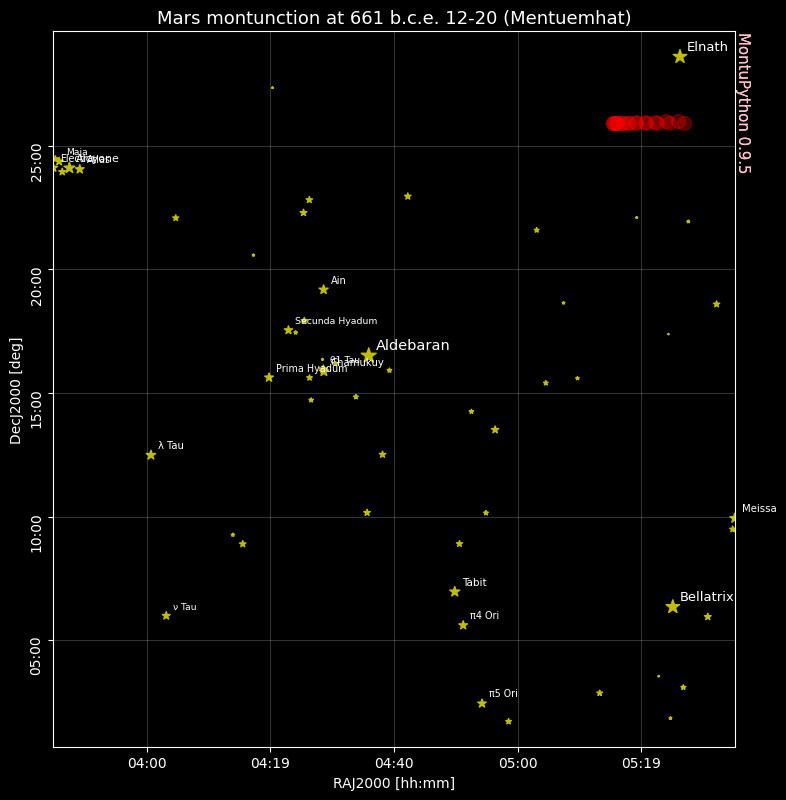

In [163]:
# Time of montunction
isel = 0
mtime_montunction = montu.Time(montunctions_selected.iloc[isel].jed,format='jd',full=True)
t = mtime_montunction.tt

mars.reset_store()
for t in np.linspace(-20*montu.DAY,20*montu.DAY,20):
    # Get MonTime object
    mtime = mtime_montunction + t

    # Calculate Mars position and store it
    mars.where_in_sky(mtime,Tebas,store=1)
mars.tabulate_store()

# Plot Hyades
hyades = allstars.get_stars_around(center=[aldebaran.data.RAJ2000,aldebaran.data.DecJ2000],radius=15,Vmag=[-1,5])
fig,ax = hyades.plot_stars(pad=0.0,labels=True,label_mag=4,figargs=dict(figsize=(8,8)))

for index in mars.position.index:
    mars_position = mars.position.loc[index]
    ax.plot(15*mars_position.RAJ2000,mars_position.DecJ2000,'ro',ms=10,alpha=0.3)

ax.set_title(f"Mars montunction at {-mtime_montunction.readable.year+1} \
b.c.e. {mtime_montunction.readable.month:02d}-{mtime_montunction.readable.day:02d} (Mentuemhat)",fontsize=13)
montu.Util.montu_mark(ax);

## Conjunctions

We are interested in the Montunctions happening around the date of birth or dead of Mentuhotep (2119 - 2103)

In [161]:
mtime_start = montu.Time('bce2050-08-01 00:00:00.00')+(-1*montu.YEAR)
mtime_end = montu.Time('bce2050-08-01 00:00:00.00')+1*montu.YEAR

cond = (marstices.jed>=mtime_start.jed) & (marstices.jed<=mtime_end.jed)
print("Number of marstices in the desired interval: ",cond.sum())

marstices_selected = marstices.loc[cond]
marstices_selected

Number of marstices in the desired interval:  2


,datepro,datemix,type,jed,closest_solstice,aldebaran_angdist,close_solstice,close_aldebaran,conj_aldebaran,montunctions
422,-2050-08-20 12:14:30.0000,-2050-09-06 12:14:14,first,972544.010069,121.965999,3.355051,False,True,True,False
423,-2050-11-03 04:34:50.5000,-2050-11-20 04:34:34,second,972618.690862,47.285206,18.037689,False,False,False,False


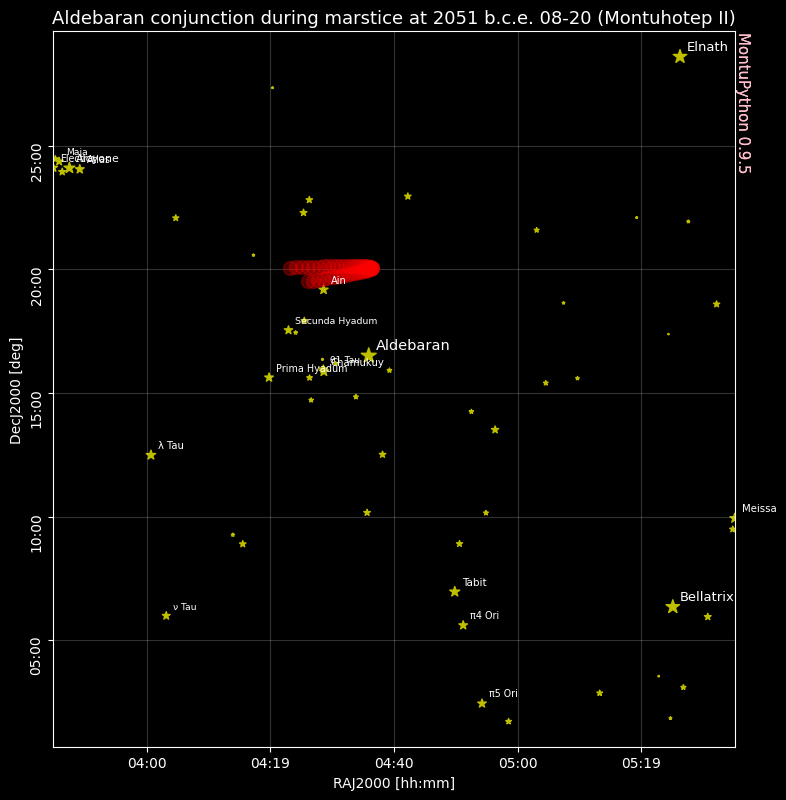

In [162]:
# Time of montunction
isel = 0
mtime_marstice = montu.Time(marstices_selected.iloc[isel].jed,format='jd',full=True)
t = mtime_marstice.tt

mars.reset_store()
for t in np.linspace(-20*montu.DAY,20*montu.DAY,50):
    # Get MonTime object
    mtime = mtime_marstice + t

    # Calculate Mars position and store it
    mars.where_in_sky(mtime,Tebas,store=1)
mars.tabulate_store()

# Plot Hyades
hyades = allstars.get_stars_around(center=[aldebaran.data.RAJ2000,aldebaran.data.DecJ2000],radius=15,Vmag=[-1,5])
fig,ax = hyades.plot_stars(pad=0.0,labels=True,label_mag=4,figargs=dict(figsize=(8,8)))

for index in mars.position.index:
    mars_position = mars.position.loc[index]
    ax.plot(15*mars_position.RAJ2000,mars_position.DecJ2000,'ro',ms=10,alpha=0.3)

ax.set_title(f"Aldebaran conjunction during marstice at {-mtime_marstice.readable.year+1} \
b.c.e. {mtime_marstice.readable.month:02d}-{mtime_marstice.readable.day:02d} (Montuhotep II)",fontsize=13)
montu.Util.montu_mark(ax);

In [146]:
mtime_start = montu.Time('bce1580-08-01 00:00:00.00')+(-100*montu.YEAR)
mtime_end = montu.Time('bce1580-08-01 00:00:00.00')+100*montu.YEAR

cond = (marstices.jed>=mtime_start.jed) & (marstices.jed<=mtime_end.jed) & (marstices.aldebaran_angdist<=max_aldebaran_conjunc)
print("Number of marstices in the desired interval: ",cond.sum())

marstices_selected = marstices.loc[cond]
marstices_selected

Number of marstices in the desired interval:  2


,datepro,datemix,type,jed,closest_solstice,aldebaran_angdist,close_solstice,close_aldebaran,conj_aldebaran,montunctions
880,-1561-08-22 22:36:39.1000,-1561-09-05 22:36:36,first,1.151150e+06,119.410078,4.893175,False,True,True,False
954,-1482-08-26 07:38:10.3000,-1482-09-08 07:38:38,first,1.180008e+06,116.239785,3.616589,False,True,True,False


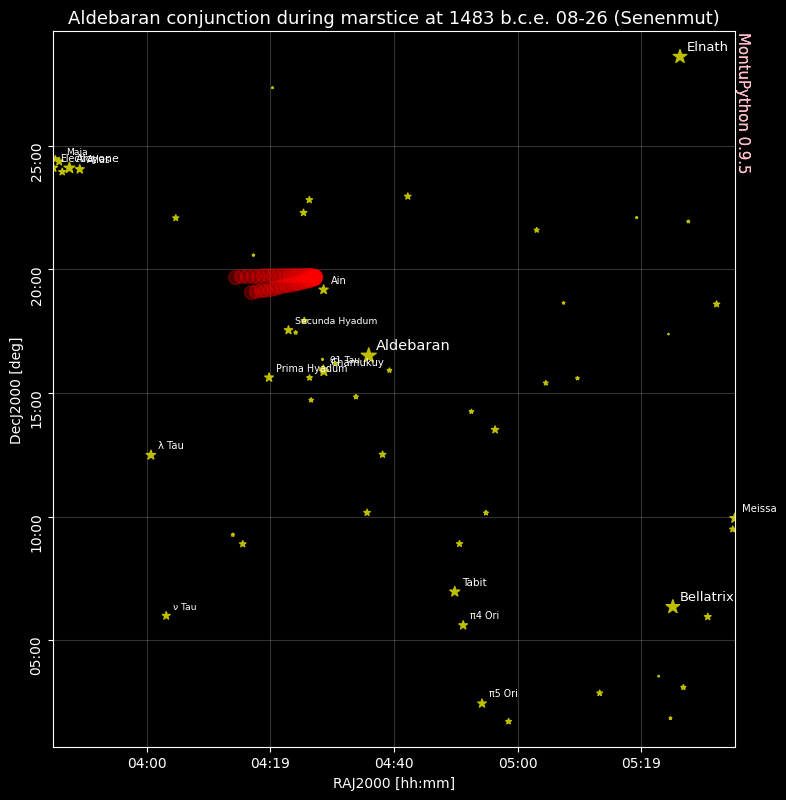

In [147]:
# Time of montunction
isel = 1
mtime_marstice = montu.Time(marstices_selected.iloc[isel].jed,format='jd',full=True)
t = mtime_marstice.tt

mars.reset_store()
for t in np.linspace(-20*montu.DAY,20*montu.DAY,50):
    # Get MonTime object
    mtime = mtime_marstice + t

    # Calculate Mars position and store it
    mars.where_in_sky(mtime,Tebas,store=1)
mars.tabulate_store()

# Plot Hyades
hyades = allstars.get_stars_around(center=[aldebaran.data.RAJ2000,aldebaran.data.DecJ2000],radius=15,Vmag=[-1,5])
fig,ax = hyades.plot_stars(pad=0.0,labels=True,label_mag=4,figargs=dict(figsize=(8,8)))

for index in mars.position.index:
    mars_position = mars.position.loc[index]
    ax.plot(15*mars_position.RAJ2000,mars_position.DecJ2000,'ro',ms=10,alpha=0.3)

ax.set_title(f"Aldebaran conjunction during marstice at {-mtime_marstice.readable.year+1} \
b.c.e. {mtime_marstice.readable.month:02d}-{mtime_marstice.readable.day:02d} (Senenmut)",fontsize=13)
montu.Util.montu_mark(ax);